In [1]:
from sympy import init_session
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib widget
import os, glob, pathlib
from loky import get_reusable_executor
import dill as pickle
init_session()

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [2]:
(
    ThAnal,
    Phi,
    th,
    phi,
    Lc,
    K,
    E,
    H,
    a0,
    f1,
    f2,
    eta,
    de,
    mup,
    omext,
    ompext,
    e,
    a,
    pom,
    t,
    ep,
    l,
    T_res,
    eps,
) = symbols(
    r"Theta Phi theta phi L K E H a_0 f_1 f_2 eta delta mu_p \omega_{\mathrm{ext}} \omega_{\mathrm{p\,ext}} e a varpi t e_p lambda T_{\mathrm{res}} epsilon"
)
j = symbols("j", positive=True)
a0val = (3 / 2) ** (2.0 / 3)

# Expressions

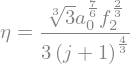

In [3]:
eta_expr = (f2 / (3 * (j + 1) ** 2)) ** Rational(2, 3) * a0 ** Rational(7, 6)
Eq(eta, eta_expr)

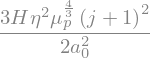

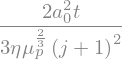

In [4]:
display(3 * (j + 1) ** 2 / (2 * a0**2) * eta**2 * mup ** Rational(4, 3) * H)
display(eta * mup ** Rational(2, 3) * Phi)
display(t / (3 * (j + 1) ** 2 / (2 * a0**2) * eta * mup ** Rational(2, 3)))

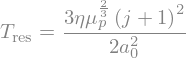

In [5]:
T_res_expr = 3 * (j + 1) ** 2 / (2 * a0**2) * eta * mup ** Rational(2, 3)
Eq(T_res, T_res_expr)

## $e_p = 0$ resonance

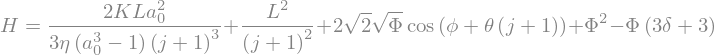

In [6]:
H_expr = (
    Phi**2
    - 3 * (de + 1) * Phi
    + 2 * sqrt(2 * Phi) * cos((j + 1) * th + phi)
    + Lc**2 / (j + 1) ** 2
    + 2 * a0**2 * K * Lc / (3 * (j + 1) ** 3 * (a0**3 - 1) * eta)
)
Eq(H, H_expr)

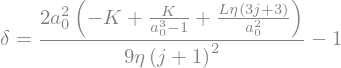

In [7]:
de_expr = (
    2
    * a0**2
    / (3 * (j + 1) ** 2 * eta)
    * (3 * (j + 1) * eta * Lc / a0**2 + K / (a0**3 - 1) - K)
    / 3
    - 1
)
Eq(de, de_expr)

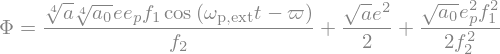

In [8]:
Phi_expr = (
    Rational(1, 2) * sqrt(a) * e**2
    + a ** Rational(1, 4)
    * a0 ** Rational(1, 4)
    * f1
    / f2
    * e
    * ep
    * cos(ompext * t - pom)
    + sqrt(a0) * f1**2 * ep**2 / f2**2 / 2
)
Eq(Phi, Phi_expr)

In [9]:
ThAnal_expr = sqrt(a) - sqrt(a0)
Eq(ThAnal, ThAnal_expr)

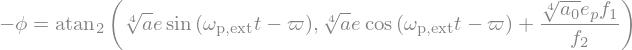

In [10]:
phi_expr = atan2(
    a ** Rational(1, 4) * e * sin(ompext * t - pom),
    a ** Rational(1, 4) * e * cos(ompext * t - pom)
    + a0 ** Rational(1, 4) * f1 * ep / f2,
)
Eq(-phi, phi_expr)

In [11]:
th_expr = l - j * t / (j + 1) - ompext * t / (j + 1)
Eq(-th * (j + 1), ((j + 1) * th_expr).expand().factor().collect(l))

In [12]:
L_expr = (j + 1) * Phi - ThAnal
Eq(Lc, L_expr)

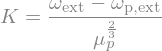

In [13]:
K_expr = (omext - ompext) / mup ** Rational(2, 3)
Eq(K, K_expr)

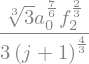

In [16]:
eta_expr

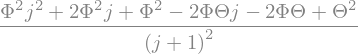

In [32]:
H_expr.subs(Lc,L_expr).args[1].expand(numer=True)

# Capture conditions

In [15]:
H_expr.subs({Lc:0,de:0,j:2})

The condition for capture is approximately $\Phi<\Phi_{\rm sep}$, where $\Phi_{\rm sep}$ is the value $\Phi$ takes at the intersection of the outer homoclinic orbit with the $X$ axis when the separatrix first appears at $\delta=0$.

In [16]:
eq_points = np.roots([2,0,-3,np.sqrt(2)])**2
print(eq_points)

[2. -0.00000000e+00j 0.5+8.25265787e-09j 0.5-8.25265787e-09j]


The stable equilibrium point is at $(3\theta+\phi,\Phi)=(\pi,2)$ and the unstable one is at $(0,1/2)$.

In [17]:
E_sep = 0.5**2-3*0.5+2
E_sep

The relative (constant terms dropped because $K=0$) energy at the separatrix $E_{\rm sep}=0.75$

In [18]:
homoclinic_points = np.roots([1,0,-3,-2*np.sqrt(2),-E_sep])**2
homoclinic_points


array([4.5       +0.00000000e+00j, 0.49999314-0.00000000e+00j,
       0.50000343-5.93863919e-06j, 0.50000343+5.93863919e-06j])

The intersection of the new homoclinic orbit is at $\Phi_{\rm homo}=4.5$

Note that in Henrard+Lemaitre+1983, the resonance zone at $\delta=0$ begins with $x=\sqrt{2\Phi}=3$, so we are in agreement.

Hence, $\Phi_{\rm cap}\lesssim 4.5\mu_p^{2/3}\eta$

If $e\sim e_p$, then in principle $\inf_{\varpi}\Phi=0$ due to the cosine term. But if $e\ll e_p$, then $|\Phi|\approx \frac{f_1^2\sqrt{a_0}}{2f_2^2}e_p^2$.

Hence capture is able to be interrupted if eccentricity damping is *strong* ($e\ll e_p$) and 

$$
e_p \gtrsim \frac{3^{2/3}a_0^{1/3}|f_2|^{4/3}\mu_p^{1/3}}{(j+1)^{2/3}|f_1|}
$$

# Numerical integration notebook

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



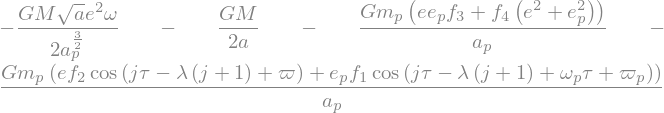

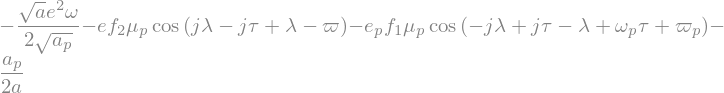

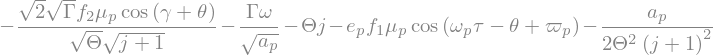

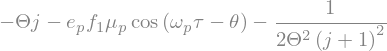

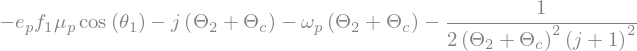

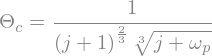

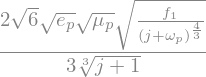

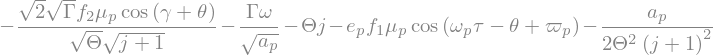

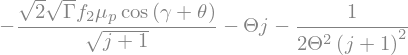

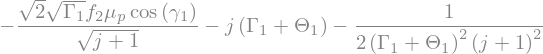

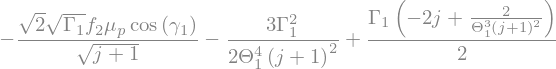

- \frac{\sqrt{2} \sqrt{\Gamma_{1}} f_{2} \mu_{p} \cos{\left(\gamma_{1} \right)}}{\sqrt{j + 1}} - \frac{3 \Gamma_{1}^{2}}{2 \Theta_{1}^{4} \left(j + 1\right)^{2}} + \frac{\Gamma_{1} \left(- 2 j + \frac{2}{\Theta_{1}^{3} \left(j + 1\right)^{2}}\right)}{2}


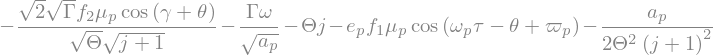

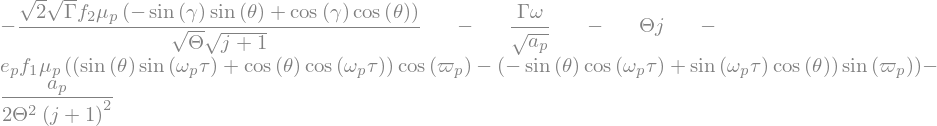

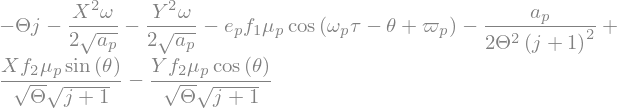

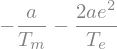

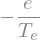

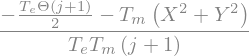

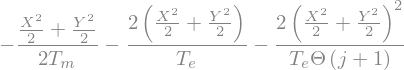

-0.381571414184445
-0.000335603535758360
- \Theta j - \frac{X^{2} \omega}{2 \sqrt{a_{p}}} - \frac{Y^{2} \omega}{2 \sqrt{a_{p}}} - e_{p} f_{1} \mu_{p} \cos{\left(\omega_{p} \tau - \theta + \varpi_{p} \right)} - \frac{a_{p}}{2 \Theta^{2} \left(j + 1\right)^{2}} + \frac{X f_{2} \mu_{p} \sin{\left(\theta \right)}}{\sqrt{\Theta} \sqrt{j + 1}} - \frac{Y f_{2} \mu_{p} \cos{\left(\theta \right)}}{\sqrt{\Theta} \sqrt{j + 1}}


In [19]:
%run "ER3BP Precession Dissipation.ipynb"

# Dissipation on test particle

In [275]:
def solve_ivp(params):
    ompval, omval, epval = params[0], params[1], params[2]
    qval, Teval, Tmval = params[3], params[4], params[5]

    def orb_elts_from_integration(integration):
        y = integration.y
        X_vals = y[0, :].astype(float)
        Y_vals = y[1, :].astype(float)
        th_vals = y[2, :].astype(float) % (2 * np.pi)
        th_vals = th_vals - 2 * np.pi * (th_vals > np.pi)
        Th_vals = y[3, :].astype(float)
        # g_func = lambdify([X, Y], g_XY)
        G_func = lambdify([X, Y], G_XY)
        a_func = lambdify(Th, a_Th)
        # g_vals = g_func(X_vals, Y_vals)
        g_vals = np.arctan2(X_vals, Y_vals)
        G_vals = G_func(X_vals, Y_vals)
        a_vals = a_func(Th_vals)
        return (
            integration.t,
            -g_vals,
            np.sqrt(2 * G_vals / np.sqrt(a_vals)),
            a_vals,
            th_vals,
        )

    def plugin(expr):
        return expr.subs(
            {
                f1: f1val_outside,
                f2: f2val_outside,
                mu_p: qval,
                j: 2,
                Te: Teval * 2 * np.pi,
                Tm: Tmval * 2 * np.pi,
                pom_p: 0,
            }
        ).evalf()

    H_eom = H_XYthTh

    Xdot = plugin(H_eom.diff(Y) + Xdot_dis)
    Ydot = plugin(-H_eom.diff(X) + Ydot_dis)
    thdot = plugin(H_eom.diff(Th))
    Thdot = plugin(-H_eom.diff(th) + Thdot_dis)
    # display(Xdot, Ydot, thdot, Thdot)

    Th_a = plugin(to_orbelts(coords_thTh[Th]))
    a_Th = plugin(to_orbelts(coords_thTh[L])) ** 2
    initVals = [-0.01, 0.0, 0, Th_a.subs({a: 1.4, j: 2})]

    event1 = float(Th_a.subs({a: 1.2, j: 2}))
    event2 = float(Th_a.subs({a: 2.0, j: 2}))
    tspan = (0, 2 * np.pi * 1e6)
    t_eval = np.linspace(tspan[0], tspan[1], 100000)

    def f(t, Y):
        return Y[3] - event1

    def fp(t, Y):
        return Y[3] - event2

    f.terminal = True
    fp.terminal = True

    def run(ompval, omval, epval):
        Xdot_prec = Xdot.subs({om: omval, om_p: ompval, e_p: epval})
        Ydot_prec = Ydot.subs({om: omval, om_p: ompval, e_p: epval})
        thdot_prec = thdot.subs({om: omval, om_p: ompval, e_p: epval})
        Thdot_prec = Thdot.subs({om: omval, om_p: ompval, e_p: epval})

        lhs = lambdify(
            [a_p, tau, X, Y, th, Th], [Xdot_prec, Ydot_prec, thdot_prec, Thdot_prec]
        )

        def LHS(t, Y):
            return lhs(1, t, *Y)

        integration = sp.integrate.solve_ivp(
            LHS,
            tspan,
            initVals,
            # atol=1e-9,
            rtol=1e-9,
            t_eval=t_eval,
            events=[f, fp],
            method="DOP853",
        )
        return integration

    sol = run(ompval, omval, epval)
    t_int, pom_int, e_int, a_int, th_int = orb_elts_from_integration(sol)
    data = {}
    data["t"] = t_int
    data["pom"] = pom_int
    data["e"] = e_int
    data["a"] = a_int
    data["th"] = th_int
    events = sol.t_events
    return (data, params, events)

In [266]:
Phi_PLOT_func = lambdify(
    [a, e, pom, t, ompext,ep],
    Phi_expr.subs({f1: f1val_outside, f2: f2val_outside, a0: a0val}),
)


def plot(sol, params):
    ompval, omval, epval = params[0], params[1], params[2]
    qval, Teval, Tmval = params[3], params[4], params[5]
    mpl.rcParams["lines.markersize"] = 0.2
    with mpl.rc_context(analytic):
        fig, ax = plt.subplots(5, 2, figsize=(8, 12))
    ax = ax.flatten()
    print(ax.shape)
    fig.subplots_adjust(left=0.2)

    for ii,axis in enumerate(ax[2:]):
        if ii not in [5]:
            axis.set_ylim(-np.pi, np.pi)
    for axis in ax[:-1]:
        axis.xaxis.set_ticklabels([])
    for axis in ax:
        axis.set_xlim((sol["t"][0], sol["t"][-1]))

    # ax[0].twinx().scatter(sol["t"], (sol["a"])**(3/2),c="orange")
    th_0 = (sol["th"] - sol["pom"]) % (2 * np.pi)
    th_0 = th_0 - 2 * np.pi * (th_0 > np.pi)

    th_p = (sol["th"] - ompval * sol["t"]) % (2 * np.pi)
    th_p = th_p - 2 * np.pi * (th_p > np.pi)

    phi_int = np.arctan2(
        sol["a"] ** 0.25 * sol["e"] * np.sin(ompval * sol["t"] - sol["pom"]),
        sol["a"] ** 0.25 * sol["e"] * np.cos(ompval * sol["t"] - sol["pom"])
        + f1val_outside * a0val**0.25 * epval / f2val_outside,
    )

    thbar = (sol["th"] - ompval * sol["t"] + phi_int) % (2 * np.pi)
    thbar = thbar - 2 * np.pi * (thbar > np.pi)

    dpom = (sol["pom"] - ompval * sol["t"]) % (2 * np.pi)
    dpom = dpom - 2 * np.pi * (dpom > np.pi)

    Phi_int = np.array(Phi_PLOT_func(sol["a"], sol["e"], sol["pom"], sol["t"], ompval,epval),dtype=np.float64)

    ax[0].scatter(sol["t"], sol["a"], c="k")
    ax[1].scatter(sol["t"], sol["e"], c="k")
    ax[2].scatter(sol["t"], dpom, c="k")
    ax[3].scatter(sol["t"], th_0, c="k")
    ax[4].scatter(sol["t"], th_p, c="k")
    ax[5].scatter(sol["t"], thbar, c="k")
    ax[6].scatter(sol["t"], phi_int, c="k")
    ax[7].scatter(sol["t"], Phi_int, c="k")

    ax[0].set_ylabel(r"$a/a_p$")
    ax[1].set_ylabel(r"$e$")
    ax[2].set_ylabel(r"$\varpi-\varpi_p$")
    ax[3].set_ylabel(r"$\theta_0 - \varpi$")
    ax[4].set_ylabel(r"$\theta_0 - \varpi_p$")
    ax[5].set_ylabel(r"$\theta_0 + \phi$")
    ax[6].set_ylabel(r"$\phi$")
    ax[7].set_ylabel(r"$\Phi$")

    # ax[6].ticklabel_format(axis="x", scilimits=(0, 0))

    ax[6].set_xlabel(r"$t/(2\pi/n_p)$")
    fig.tight_layout()

## One shots

- $T_e=100$ orbits
- $T_m=10^{6}$ orbits
- $\omega_{\rm ext}=\omega_{\rm p,ext}=0$
- $\mu_p=5e-5\Rightarrow e_{\rm p,cap} = 0.0612,\quad T_e\omega_{\rm res}\approx0.25$

| $e_p$ | Outcome      |
| ----- | ------------ |
| 0.1   | Pass through |
| 0.07  | Pass through |
| 0.05  | Capture      |

- $T_e=63$ orbits
- $T_m=10^{6}$ orbits
- $\omega_{\rm ext}=\omega_{\rm p,ext}=0$
- $\mu_p=1e-4\Rightarrow e_{\rm p,cap} = 0.0771,\quad T_e\omega_{\rm res}\approx0.25$


| $e_p$ | Outcome      |
| ----- | ------------ |
| 0.085 | Pass through |
| 0.07  | Capture      |

- $T_e=470$ orbits
- $T_m=10^{6}$ orbits
- $\omega_{\rm ext}=\omega_{\rm p,ext}=0$
- $\mu_p=5e-6\Rightarrow e_{\rm p,cap} = 0.028,\quad T_e\omega_{\rm res}\approx0.25$


| $e_p$ | Outcome      |
| ----- | ------------ |
| 0.02  | Capture      |
| 0.042 | Pass through |
| 0.07  | Capture      |

In [272]:
17.15*3e-6

In [274]:
qval = 5e-6
Teval = 470
print(Teval)
Tmval = 1e6
ompval = 0.0
omval = 0.0
epval = 0.07

epcrit = 3**(2./3)*a0val**(1./3)*qval**(1./3)*np.abs(f2val_outside)**(4./3)/(np.abs(f1val_outside)*(2+1)**(2./3))
display(epcrit)

eta_val = np.float64(eta_expr.subs({a0: a0val, f2: f2val_outside, j: 2}).evalf())
T_res_val = T_res_expr.subs({mup:qval,j:2,a0:a0val,eta:eta_val})
display(T_res_val)
display(T_res_val*Teval)
display(1/T_res_val)

470


In [268]:
params = (ompval, omval, epval, qval, Teval, Tmval)
sol, ps, evs = solve_ivp(params)

(10,)


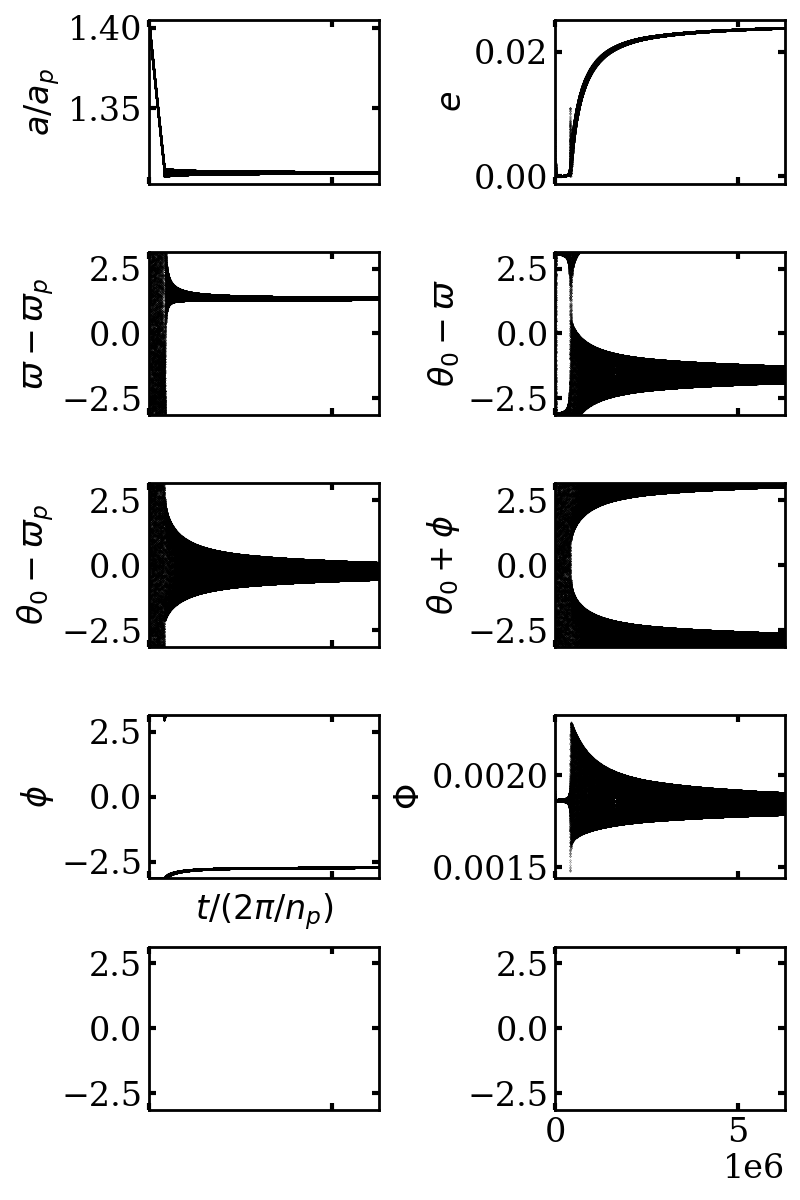

In [269]:
plot(sol, params)

- $T_e=10^{4}$ orbits
- $T_m=10^{7}$ orbits
- $\omega_{\rm ext}=\omega_{\rm p,ext}=0$

| $q$, $e_p$ | $\Phi_{\rm min}$ | Outcome      |
| ---------- | ---------------- | ------------ |
| 1e-5, 0.1  | .0015            | Pass through |
| 5e-5, 0.1  | 0                | Capture      |


- $T_e=10^{3}$ orbits
- $T_m=10^{7}$ orbits
- $\omega_{\rm ext}=\omega_{\rm p,ext}=0$

| $q$, $e_p$ | $\Phi_{\rm min}$ | Outcome      |
| ---------- | ---------------- | ------------ |
| 5e-5, 0.1  | 9.8e-4           | Pass through |

## Resonance depth

In [18]:
de_expr.subs({eta: eta_expr}).subs({a0: a0val, f2: f2val_outside, j: 2})

In [81]:
qval = 1e-4
Teval = 1e4
Tmval = 1e7
ompval = 0.0
omval = 0.0
epval = 0.0
params = (ompval, omval, epval, qval, Teval, Tmval)
sol, ps, evs = solve_ivp(params)

In [82]:
K_val = (omval - ompval) / qval ** (2.0 / 3)
eta_val = np.float64(eta_expr.subs({a0: a0val, f2: f2val_outside, j: 2}).evalf())
eta_val, K_val

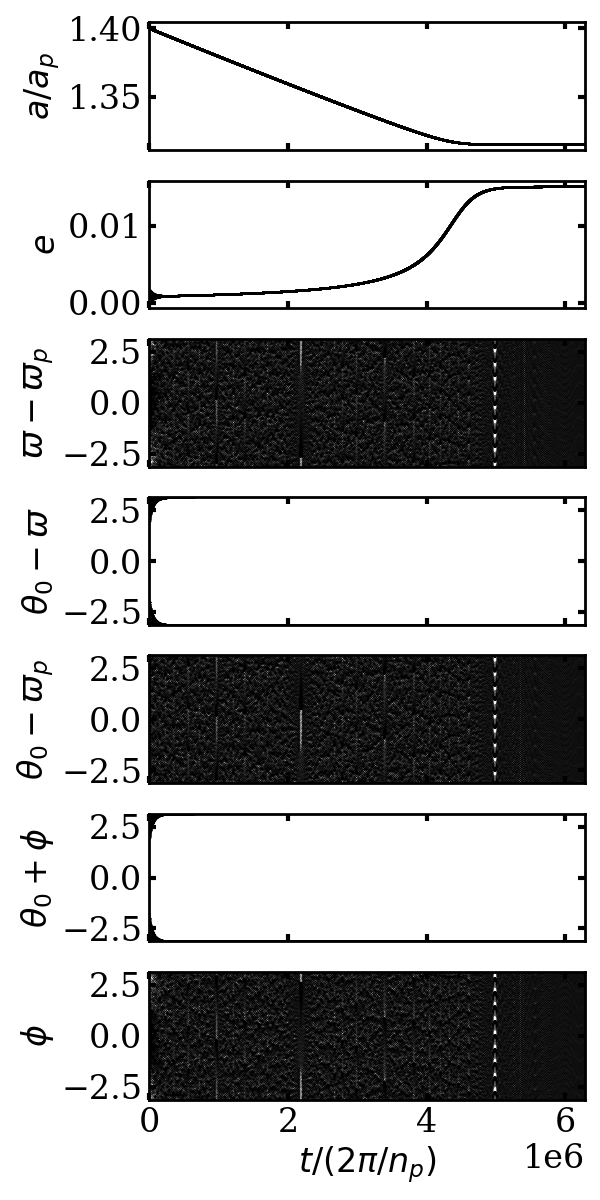

In [83]:
plot(sol, params)

In [84]:
ThAnal_expr

In [85]:
Phi_func = lambdify(
    [a, e, pom, t],
    Phi_expr.subs(
        {a0: a0val, f1: f1val_outside, f2: f2val_outside, ep: epval, ompext: ompval}
    ),
)
ThAnal_func = lambdify(
    [a, e, pom, t],
    ThAnal_expr.subs(
        {a0: a0val, f1: f1val_outside, f2: f2val_outside, ep: epval, ompext: ompval}
    ),
)
de_func = lambdify([K, Lc], de_expr.subs({j: 2, a0: a0val, eta: eta_val}))
Lc_func = lambdify([Th, Phi], L_expr)

Phi_vals = Phi_func(sol["a"], sol["e"], sol["pom"], sol["t"])
ThAnal_vals = ThAnal_func(sol["a"], sol["e"], sol["pom"], sol["t"])
Phi_vals = np.array(Phi_vals, dtype=np.float64)
ThAnal_vals = np.array(ThAnal_vals, dtype=np.float64)

L_vals = Lc_func(ThAnal_vals, Phi_vals) / (eta_val * qval ** (2.0 / 3))
de_vals = de_func(K_val, L_vals)
L_vals = np.array(L_vals, dtype=np.float64)
de_vals = np.array(de_vals, dtype=np.float64)

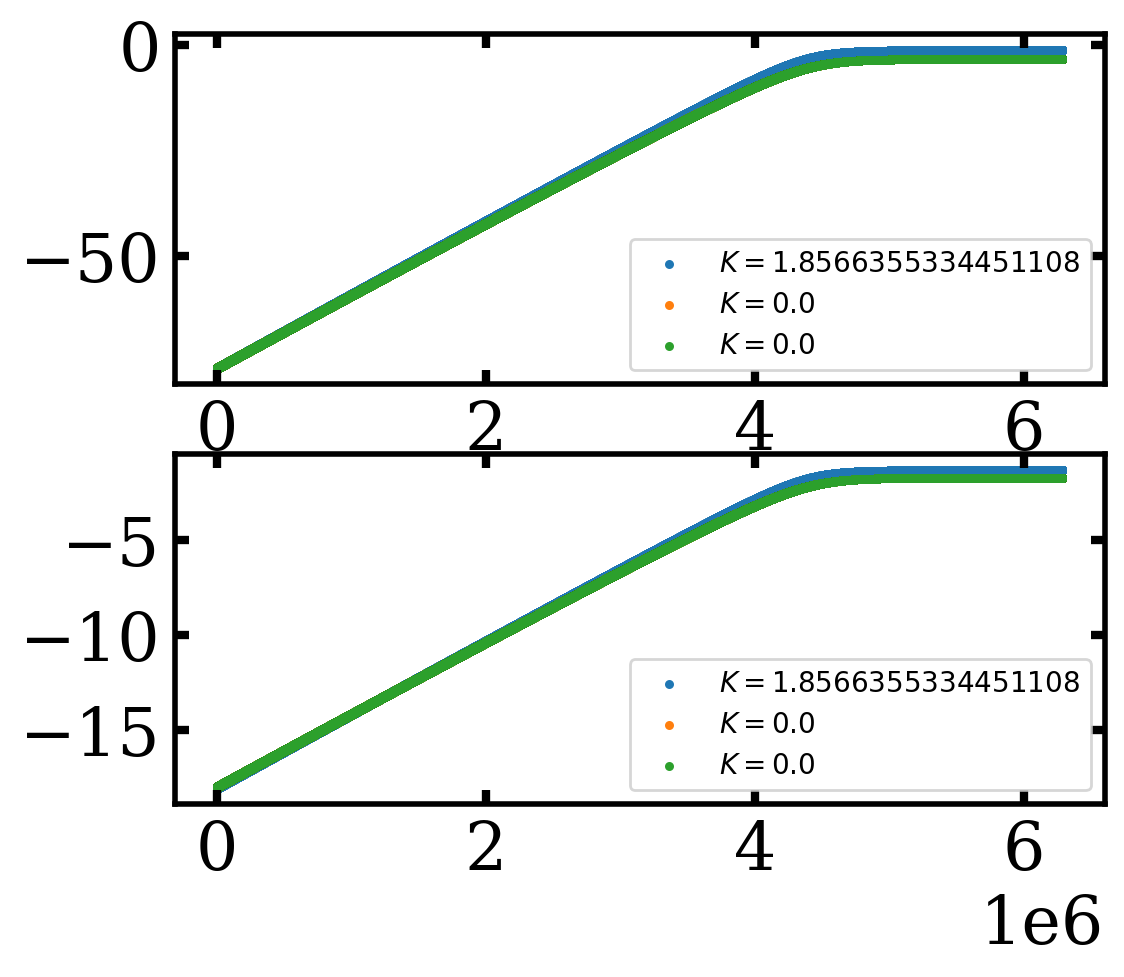

In [88]:
# with mpl.rc_context(analytic):
#    fig, ax = plt.subplots(2)
ax[0].scatter(sol["t"], L_vals, label=f"$K={(omval-ompval)/qval**(2./3)}$", s=5)
ax[1].scatter(sol["t"], de_vals, label=f"$K={(omval-ompval)/qval**(2./3)}$", s=5)
for axis in ax:
    axis.legend()
fig

# Poincaire sections

In [15]:
f1val_outside = -1.54553417167659
f2val_outside = 1.89565074126955

In [16]:
K_val = 0
eps_val = 0.0
eta_val = eta_expr.subs({a0: a0val, f2: f2val_outside, j: 2}).evalf()

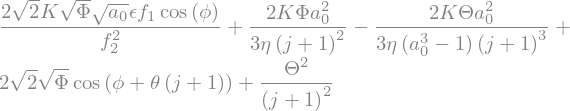

In [17]:
H2_expr = (
    ThAnal**2 / (j + 1) ** 2
    - 2 * a0**2 * K / (3 * eta * (j + 1) ** 3 * (a0**3 - 1)) * ThAnal
    + 2 * a0**2 * K / (3 * (j + 1) ** 2 * eta) * Phi
    + 2 * sqrt(a0) * f1 / f2**2 * K * eps * sqrt(2 * Phi) * cos(phi)
    + 2 * sqrt(2 * Phi) * cos((j + 1) * th + phi)
)
display(H2_expr)

In [18]:
(
    H2_expr.subs(eps, 0)
    - H_expr.subs({de: de_expr}).subs(
        {
            Lc: L_expr,
        }
    )
).simplify()

In [19]:
H2_expr = H2_expr.subs(
    {
        eps: eps_val,
        K: K_val,
        f1: f1val_outside,
        f2: f2val_outside,
        a0: a0val,
        j: 2,
        eta: eta_val,
    }
).evalf()
Eq(H, H2_expr)

In [50]:
ThAnal_dot = -H2_expr.diff(th)
PhiAnal_dot = -H2_expr.diff(phi)
phiAnal_dot = H2_expr.diff(Phi)
thAnal_dot = H2_expr.diff(ThAnal)
RHS = lambdify(
    [ThAnal, Phi, th, phi], [ThAnal_dot, PhiAnal_dot, thAnal_dot, phiAnal_dot]
)


def rhs(t, Y):
    return RHS(*Y)


def th_0_section(t, Y):
    y = Y[2] % (2 * np.pi)
    y = y - 2 * np.pi * (y > np.pi)
    return y

In [51]:
x0 = -2
x1 = 1
x2 = 0.1
x3 = np.pi / 3
display(
    de_expr.subs(
        {Lc: L_expr, K: K_val, a0: a0val, j: 2, eta: eta_val, Phi: x1, ThAnal: x0}
    ),
)

In [63]:
T = 1000
sol = sp.integrate.solve_ivp(
    rhs,
    (0, T),
    [x0, x1, x2, x3],
    t_eval=np.linspace(0, T, 1000),
    rtol=1e-9,
    events=[th_0_section],
    dense_output=True,
)

In [64]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+00 ...  9.990e+02  1.000e+03]
        y: [[-2.000e+00  7.550e+00 ... -4.480e+00  2.909e+00]
            [ 1.000e+00  4.183e+00 ...  1.735e-01  2.636e+00]
            [ 1.000e-01  8.803e-01 ...  1.426e+02  1.422e+02]
            [ 1.047e+00  9.291e-01 ... -4.244e+02 -4.249e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x15b41d2b0>
 t_events: [array([ 1.540e+01,  1.636e+01, ...,  9.938e+02,  9.943e+02])]
 y_events: [array([[ 5.753e+00,  3.584e+00,  3.142e+00, -5.221e+00],
                  [-4.023e+00,  3.256e-01,  3.142e+00, -5.179e+00],
                  ...,
                  [-2.754e+00,  7.486e-01,  1.414e+02, -4.226e+02],
                  [ 3.437e+00,  2.812e+00,  1.414e+02, -4.225e+02]])]
     nfev: 82352
     njev: 0
      nlu: 0

In [65]:
sol.y_events[0].shape

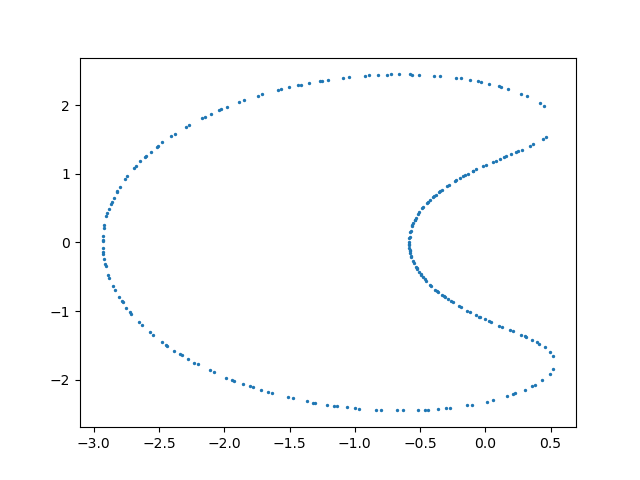

In [69]:
fig, ax = plt.subplots()
# ax.scatter(np.sqrt(2*sol.y[1,:])*np.cos(3*sol.y[2,:]+sol.y[3,:]), np.sqrt(2*sol.y[1,:])*np.sin(3*sol.y[2,:]+sol.y[3,:]),s=2)
ax.scatter(np.sqrt(2*sol.y_events[0][:,1])*np.cos(3*sol.y_events[0][:,2]+sol.y_events[0][:,3]), np.sqrt(2*sol.y_events[0][:,1])*np.sin(3*sol.y_events[0][:,2]+sol.y_events[0][:,3]),s=2)

In [86]:
display(
    L_expr.subs({Phi: x1, ThAnal: x0, j: 2}),
    de_expr.subs(
        {Lc: L_expr, K: K_val, a0: a0val, j: 2, eta: eta_val, Phi: x1, ThAnal: x0}
    ),
    H2_expr.subs({Phi: x1, ThAnal: x0, phi: x3, th: x2}),
    H_expr.subs({de: de_expr})
    .subs({Lc: L_expr})
    .subs(
        {
            Phi: x1,
            ThAnal: x0,
            phi: x3,
            th: x2,
            K: K_val,
            eta: eta_val,
            j: 2,
            a0: a0val,
        }
    )
    .evalf(),
)

# Changing $a_p$

In [20]:
def solve_ivp_planet_mig(params):
    ompval, omval, epval = params[0], params[1], params[2]
    qval, Tmval, Tval = params[3], params[4], params[5]
    e0val, pom0val = params[6], params[7]

    def orb_elts_from_integration(integration):
        y = integration.y
        X_vals = y[0, :].astype(float)
        Y_vals = y[1, :].astype(float)
        th_vals = y[2, :].astype(float) % (2 * np.pi)
        th_vals = th_vals - 2 * np.pi * (th_vals > np.pi)
        Th_vals = y[3, :].astype(float)
        # g_func = lambdify([X, Y], g_XY)
        G_func = lambdify([X, Y], G_XY)
        a_func = lambdify(Th, a_Th)
        # g_vals = g_func(X_vals, Y_vals)
        g_vals = np.arctan2(X_vals, Y_vals)
        G_vals = G_func(X_vals, Y_vals)
        a_vals = a_func(Th_vals)
        return (
            integration.t,
            -g_vals,
            np.sqrt(2 * G_vals / np.sqrt(a_vals)),
            a_vals,
            th_vals,
        )

    def plugin(expr):
        return expr.subs(
            {
                f1: f1val_outside,
                f2: f2val_outside,
                mu_p: qval,
                j: 2,
                pom_p: 0,
            }
        ).evalf()

    H_eom = H_XYthTh

    Xdot = plugin(H_eom.diff(Y))
    Ydot = plugin(-H_eom.diff(X))
    thdot = plugin(H_eom.diff(Th))
    Thdot = plugin(-H_eom.diff(th))
    # display(Xdot, Ydot, thdot, Thdot)

    a_init = 1.4
    Th_a = plugin(to_orbelts(coords_thTh[Th]))
    a_Th = plugin(to_orbelts(coords_thTh[L])) ** 2
    X_0 = to_orbelts(X_gG).subs({e: e0val, a: a_init, pom: pom0val}).evalf()
    Y_0 = to_orbelts(Y_gG).subs({e: e0val, a: a_init, pom: pom0val}).evalf()
    initVals = [X_0, Y_0, 0, Th_a.subs({a: a_init, j: 2})]

    event1 = float(Th_a.subs({a: 1.2, j: 2}))
    event2 = float(Th_a.subs({a: 2.0, j: 2}))
    tspan = (0, 2 * np.pi * Tval)
    t_eval = np.linspace(tspan[0], tspan[1], 100000)

    def f(t, Y):
        return Y[3] - event1

    def fp(t, Y):
        return Y[3] - event2

    f.terminal = True
    fp.terminal = True

    def run(ompval, omval, epval):
        Xdot_prec = Xdot.subs({om: omval, om_p: ompval, e_p: epval})
        Ydot_prec = Ydot.subs({om: omval, om_p: ompval, e_p: epval})
        thdot_prec = thdot.subs({om: omval, om_p: ompval, e_p: epval})
        Thdot_prec = Thdot.subs({om: omval, om_p: ompval, e_p: epval})

        lhs = lambdify(
            [a_p, tau, X, Y, th, Th], [Xdot_prec, Ydot_prec, thdot_prec, Thdot_prec]
        )

        def LHS(t, Y):
            return lhs(1 + t / (Tmval * 2 * np.pi), t, *Y)

        integration = sp.integrate.solve_ivp(
            LHS,
            tspan,
            initVals,
            # atol=1e-9,
            rtol=1e-9,
            t_eval=t_eval,
            events=[f, fp],
            method="DOP853",
        )
        return integration

    sol = run(ompval, omval, epval)
    t_int, pom_int, e_int, a_int, th_int = orb_elts_from_integration(sol)
    data = {}
    data["t"] = t_int
    data["pom"] = pom_int
    data["e"] = e_int
    data["a"] = a_int
    data["th"] = th_int
    events = sol.t_events
    return (data, params, events)

In [21]:
Phi_PLOT_func = lambdify(
    [a, e, pom, t, ompext,ep],
    Phi_expr.subs({f1: f1val_outside, f2: f2val_outside, a0: a0val}),
)


def plot(sol, params):
    ompval, omval, epval = params[0], params[1], params[2]
    qval, Tmval = params[3], params[4]
    mpl.rcParams["lines.markersize"] = 0.2
    with mpl.rc_context(analytic):
        fig, ax = plt.subplots(5, 2, figsize=(8, 12))
    ax = ax.flatten()
    print(ax.shape)
    fig.subplots_adjust(left=0.2)

    for ii,axis in enumerate(ax[2:]):
        if ii not in [5]:
            axis.set_ylim(-np.pi, np.pi)
    for axis in ax[:-1]:
        axis.xaxis.set_ticklabels([])
    for axis in ax:
        axis.set_xlim((sol["t"][0], sol["t"][-1]))

    # ax[0].twinx().scatter(sol["t"], (sol["a"])**(3/2),c="orange")
    th_0 = (sol["th"] - sol["pom"]) % (2 * np.pi)
    th_0 = th_0 - 2 * np.pi * (th_0 > np.pi)

    th_p = (sol["th"] - ompval * sol["t"]) % (2 * np.pi)
    th_p = th_p - 2 * np.pi * (th_p > np.pi)

    phi_int = np.arctan2(
        sol["a"] ** 0.25 * sol["e"] * np.sin(ompval * sol["t"] - sol["pom"]),
        sol["a"] ** 0.25 * sol["e"] * np.cos(ompval * sol["t"] - sol["pom"])
        + f1val_outside * a0val**0.25 * epval / f2val_outside,
    )

    thbar = (sol["th"] - ompval * sol["t"] + phi_int) % (2 * np.pi)
    thbar = thbar - 2 * np.pi * (thbar > np.pi)

    dpom = (sol["pom"] - ompval * sol["t"]) % (2 * np.pi)
    dpom = dpom - 2 * np.pi * (dpom > np.pi)

    Phi_int = np.array(Phi_PLOT_func(sol["a"], sol["e"], sol["pom"], sol["t"], ompval,epval),dtype=np.float64)

    ax[0].scatter(sol["t"], sol["a"], c="k")
    ax[1].scatter(sol["t"], sol["e"], c="k")
    ax[2].scatter(sol["t"], dpom, c="k")
    ax[3].scatter(sol["t"], th_0, c="k")
    ax[4].scatter(sol["t"], th_p, c="k")
    ax[5].scatter(sol["t"], thbar, c="k")
    ax[6].scatter(sol["t"], phi_int, c="k")
    ax[7].scatter(sol["t"], Phi_int, c="k")

    ax[0].set_ylabel(r"$a$")
    ax[1].set_ylabel(r"$e$")
    ax[2].set_ylabel(r"$\varpi-\varpi_p$")
    ax[3].set_ylabel(r"$\theta_0 - \varpi$")
    ax[4].set_ylabel(r"$\theta_0 - \varpi_p$")
    ax[5].set_ylabel(r"$\theta_0 + \phi$")
    ax[6].set_ylabel(r"$\phi$")
    ax[7].set_ylabel(r"$\Phi$")

    # ax[6].ticklabel_format(axis="x", scilimits=(0, 0))

    ax[6].set_xlabel(r"$t/(2\pi/n_p)$")
    fig.tight_layout()

## One shots

In [72]:
qval = 5e-5
Tmval = 1e6
ompval = 2e-5
omval = 1e-5
epval = 0.03
Tval = 3e5
e0val = 0.03
pom0val = 1

epcrit = 3**(2./3)*a0val**(1./3)*qval**(1./3)*np.abs(f2val_outside)**(4./3)/(np.abs(f1val_outside)*(2+1)**(2./3))
display(epcrit)

eta_val = np.float64(eta_expr.subs({a0: a0val, f2: f2val_outside, j: 2}).evalf())
T_res_val = T_res_expr.subs({mup:qval,j:2,a0:a0val,eta:eta_val})
display(T_res_val)
display(1/T_res_val)

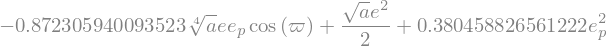

In [73]:
Phi_expr.subs({a0:a0val,a:a0val,f1:f1val_outside,f2:f2val_outside,ompext:0})

In [74]:
Phi_val_eeppom = lambdify([e,pom,e_p],Phi_expr.subs({a0:a0val,a:a0val,f1:f1val_outside,f2:f2val_outside,ompext:0}))

In [75]:
params = (ompval, omval, epval, qval, Tmval, Tval, e0val, pom0val)
sol, ps, evs = solve_ivp_planet_mig(params)

(10,)


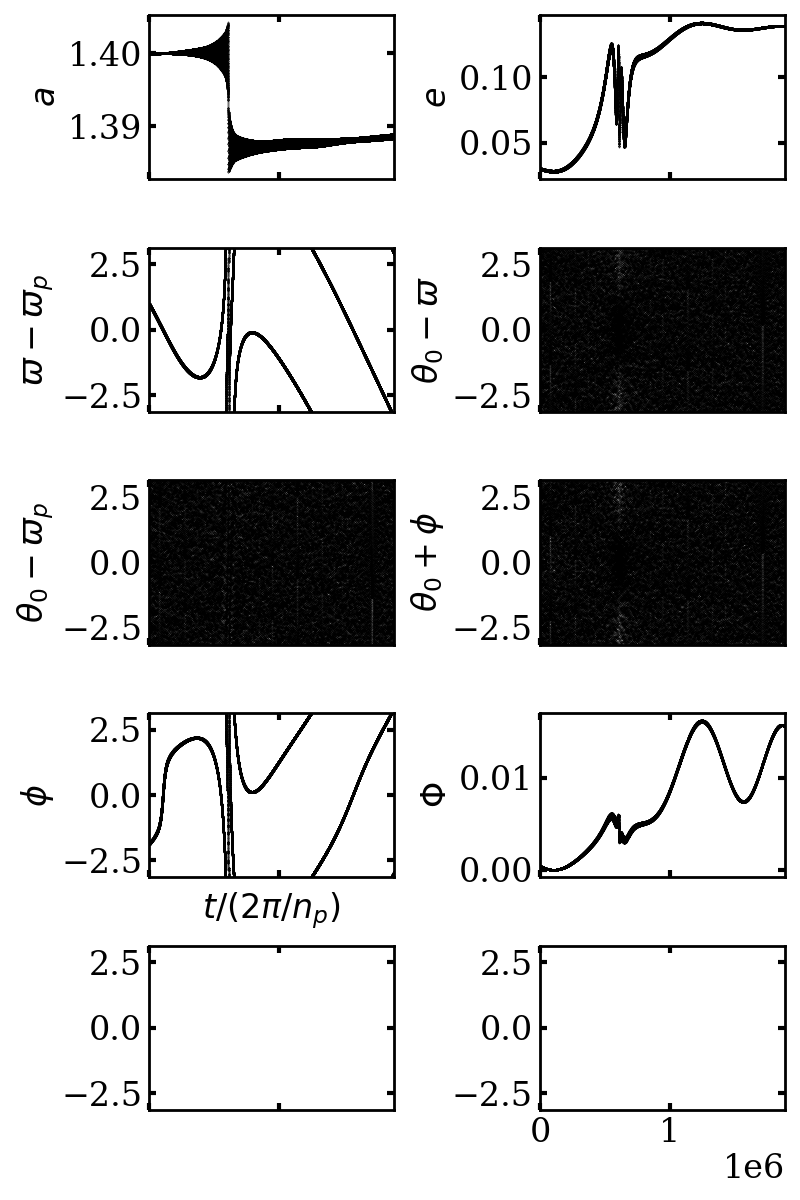

In [76]:
plot(sol, params)

## Grid

In [21]:
def map_solve(job):
    print(job[0])
    return(solve_ivp_planet_mig(job[1]))

In [22]:
Tmval = 1e6
ompval = 0.0
omval = 0.0
e0val = 0.0
pom0val = 1
Tval = 3e5

qvals = np.logspace(np.log10(3e-6), -3, 10)
epvals = np.logspace(-2, np.log10(0.2), 10)

jobs = []
ii = 0
for qval in qvals:
    for epval in epvals:
        jobs += [[ii, (ompval, omval, epval, qval, Tmval, Tval, e0val, pom0val)]]
        ii += 1

print(jobs)

[[0, (0.0, 0.0, 0.01, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [1, (0.0, 0.0, 0.013949507939624208, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [2, (0.0, 0.0, 0.01945887717576389, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [3, (0.0, 0.0, 0.027144176165949066, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [4, (0.0, 0.0, 0.03786479009414649, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [5, (0.0, 0.0, 0.052819519005050046, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [6, (0.0, 0.0, 0.07368062997280773, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [7, (0.0, 0.0, 0.10278085328021955, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [8, (0.0, 0.0, 0.14337423288737733, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [9, (0.0, 0.0, 0.20000000000000004, 3.0000000000000013e-06, 1000000.0, 300000.0, 0.0, 1)], [10, (0.0, 0.0, 0.01, 5.720593855676915e-06, 1000000.0, 300000.0, 0.0, 1)], [11, (0.0, 0.0, 0.0139495

In [23]:
executors_solve_ivp = get_reusable_executor(max_workers=8)
results = list(executors_solve_ivp.map(map_solve, jobs))

61

0
5
7
2
4
3
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [24]:
3**(2./3)*a0val**(1./3)*np.abs(f2val_outside)**(4./3)/(np.abs(f1val_outside)*(2+1)**(2./3))

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_42591/2617127869.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("$\mu_p$")


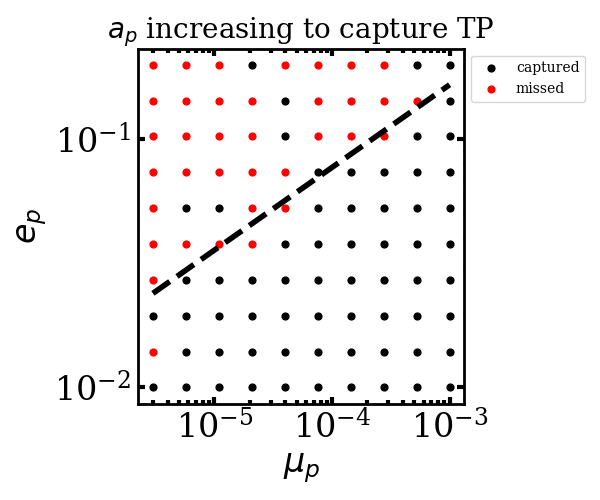

In [30]:
epcrits = 3**(2./3)*a0val**(1./3)*qvals**(1./3)*np.abs(f2val_outside)**(4./3)/(np.abs(f1val_outside)*(2+1)**(2./3))
fig, ax = plt.subplots()
for ii,result in enumerate(results):
    sol = result[0]
    ps = result[1]

    ompval, omval, epval = ps[0], ps[1], ps[2]
    qval, Tmval, Tval = ps[3], ps[4], ps[5]
    e0val, pom0val = ps[6], ps[7]
    
    if sol["a"][-1]>1.5:
        ax.scatter(qval,epval,c="k",s=24)
        #ax.text(qval,epval,f"{ii}")
    else:
        ax.scatter(qval,epval,c="r",s=24)

ax.scatter(-1,-1,c="k",s=24,label="captured")
ax.scatter(-1,-1,c="r",s=24,label="missed")


ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(qvals,epcrits,ls="--",c="k",lw=4)
ax.set_ylabel("$e_p$")
ax.set_xlabel("$\mu_p$")
ax.legend(bbox_to_anchor=[1,1,0,0])
ax.set_title(r"$a_p$ increasing to capture TP")
fig.tight_layout()

(10,)


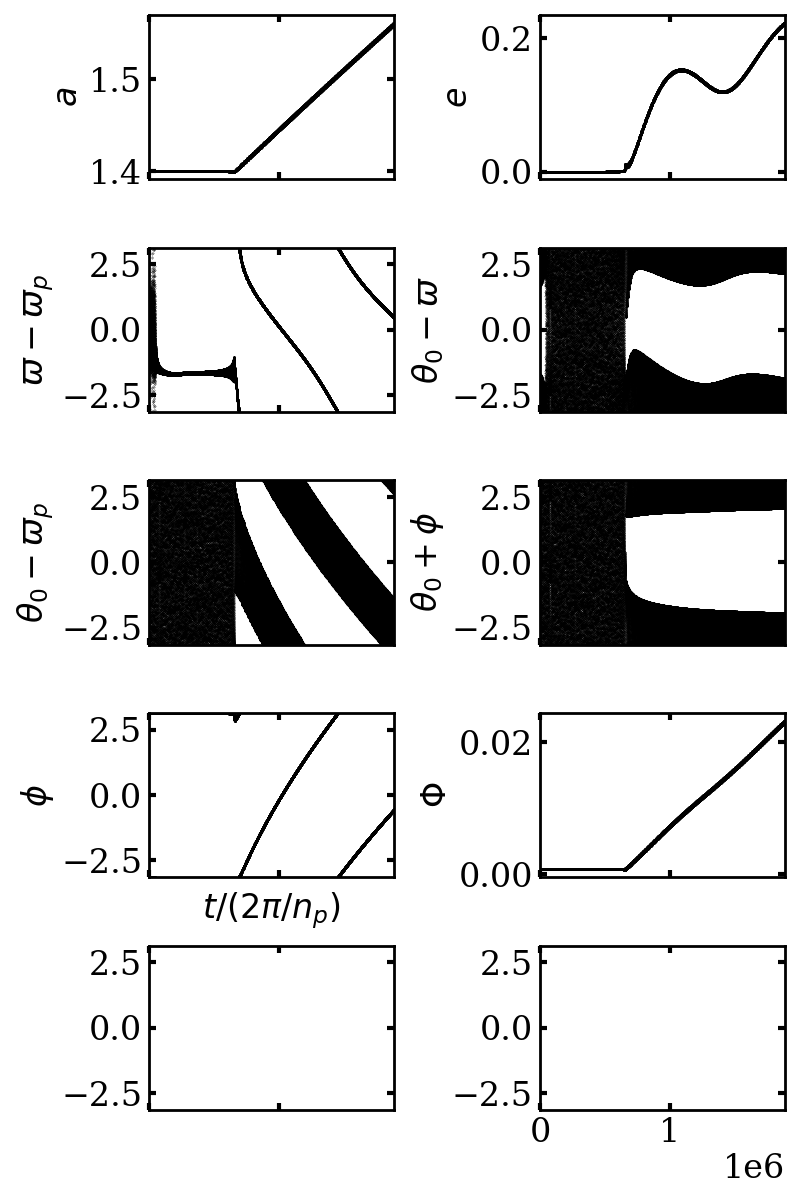

In [71]:
plot(results[4][0],results[4][1])

In [47]:

sol, ps, evs = solve_ivp_planet_mig(params)
epcrit = 3**(2./3)*a0val**(1./3)*qval**(1./3)*np.abs(f2val_outside)**(4./3)/(np.abs(f1val_outside)*(2+1)**(2./3))
display(epcrit)

(10,)


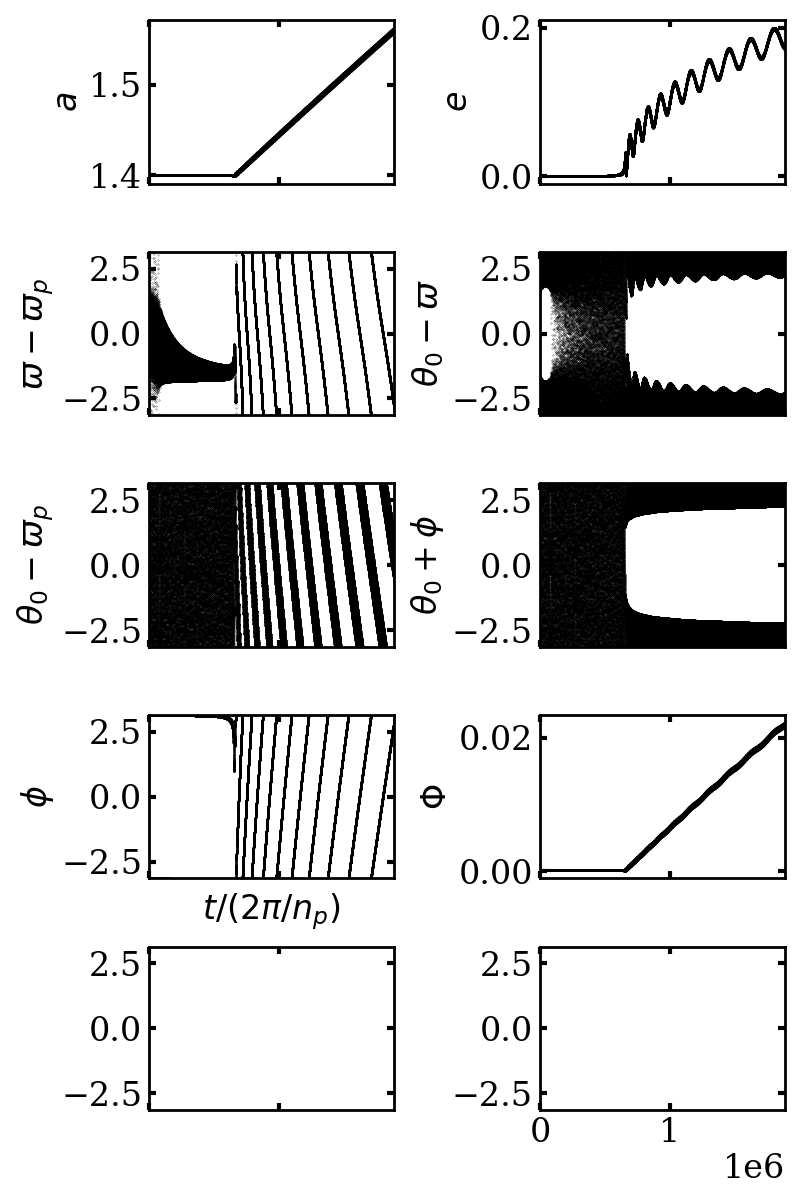

In [48]:
plot(sol,params)

# Probability of capture assuming evenly distributed $\varpi$

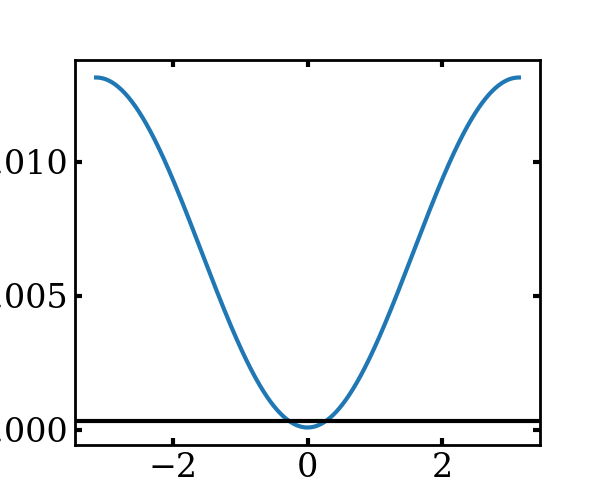

In [ ]:
pomvals = np.linspace(-np.pi,np.pi,1000)
fig, ax = plt.subplots()
ax.plot(pomvals, Phi_val_eeppom(0.07,pomvals,0.1))
ax.axhline(y=4.5*qval**(2./3)*eta_val)

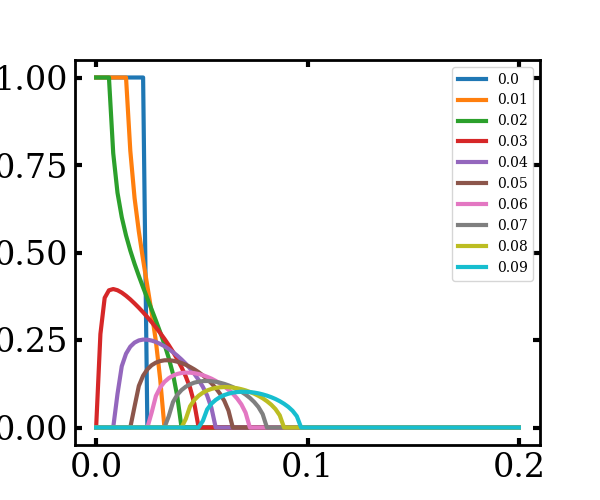

In [ ]:
pomvals = np.linspace(-np.pi,np.pi,10000)
evals = np.linspace(0., 0.2, 100)
fig, ax = plt.subplots()
for epval in np.arange(10)*0.01:
    probs = np.zeros(len(evals))
    for ii, eval in enumerate(evals):
        probs[ii] = np.sum(Phi_val_eeppom(eval,pomvals,epval)<4.5*qval**(2./3)*eta_val)/len(pomvals)
    ax.plot(evals,probs,label=f"{epval}") 
ax.legend()
